In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
X = df.loc[:, 2:].values

In [5]:
y = df.loc[:, 1].values

In [8]:
le = LabelEncoder()

In [9]:
y = le.fit_transform(y)

In [10]:
y[0]

1

In [11]:
le.transform(['M'])

array([1])

In [12]:
from sklearn.cross_validation import train_test_split

/home/hirokiky/dev/pydata_now/env/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [14]:
X_train[0]

array([  1.79900000e+01,   2.06600000e+01,   1.17800000e+02,
         9.91700000e+02,   1.03600000e-01,   1.30400000e-01,
         1.20100000e-01,   8.82400000e-02,   1.99200000e-01,
         6.06900000e-02,   4.53700000e-01,   8.73300000e-01,
         3.06100000e+00,   4.98100000e+01,   7.23100000e-03,
         2.77200000e-02,   2.50900000e-02,   1.48000000e-02,
         1.41400000e-02,   3.33600000e-03,   2.10800000e+01,
         2.54100000e+01,   1.38100000e+02,   1.34900000e+03,
         1.48200000e-01,   3.73500000e-01,   3.30100000e-01,
         1.97400000e-01,   3.06000000e-01,   8.50300000e-02])

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
from sklearn.decomposition import PCA

In [18]:
from sklearn.linear_model import LogisticRegression

In [20]:
from sklearn.pipeline import Pipeline

In [24]:
pipe_lr = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=2)), ('clf', LogisticRegression(random_state=1))])

In [25]:
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [27]:
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.947


In [28]:
import numpy as np

In [29]:
from sklearn.cross_validation import StratifiedKFold

In [31]:
kfold = StratifiedKFold(y=y_train, n_folds=10, random_state=1)

In [32]:
scores = []

In [34]:
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1, np.bincount(y_train[train]), score))

Fold: 1, Class dist.: [256 153], Acc: 0.891
Fold: 2, Class dist.: [256 153], Acc: 0.978
Fold: 3, Class dist.: [256 153], Acc: 0.978
Fold: 4, Class dist.: [256 153], Acc: 0.913
Fold: 5, Class dist.: [256 153], Acc: 0.935
Fold: 6, Class dist.: [257 153], Acc: 0.978
Fold: 7, Class dist.: [257 153], Acc: 0.933
Fold: 8, Class dist.: [257 153], Acc: 0.956
Fold: 9, Class dist.: [257 153], Acc: 0.978
Fold: 10, Class dist.: [257 153], Acc: 0.956


In [35]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.950 +/- 0.029


In [37]:
list(kfold)[0][0]

array([ 46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
       111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
       124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136,
       137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149,
       150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
       163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175,
       176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188,
       189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
       202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214,
       215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 22

In [38]:
from sklearn.cross_validation import cross_val_score

In [39]:
scores = cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, cv=10, n_jobs=1)

In [40]:
print('CV accuracy scores: %s' % scores)

CV accuracy scores: [ 0.89130435  0.97826087  0.97826087  0.91304348  0.93478261  0.97777778
  0.93333333  0.95555556  0.97777778  0.95555556]


In [41]:
scores = cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, cv=10, n_jobs=4)

In [42]:
scores

array([ 0.89130435,  0.97826087,  0.97826087,  0.91304348,  0.93478261,
        0.97777778,  0.93333333,  0.95555556,  0.97777778,  0.95555556])

In [44]:
import matplotlib.pyplot as plt

/home/hirokiky/dev/pydata_now/env/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/hirokiky/dev/pydata_now/env/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [45]:
from sklearn.learning_curve import learning_curve

/home/hirokiky/dev/pydata_now/env/lib/python3.5/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [46]:
pipe_lr = Pipeline([('scl', StandardScaler()), ('clf', LogisticRegression(penalty='l2', random_state=0))])

In [48]:
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
                                                       cv=10, n_jobs=4)

In [49]:
train_mean = np.mean(train_scores, axis=1)

In [50]:
train_std = np.std(train_scores, axis=1)

In [51]:
test_mean = np.mean(test_scores, axis=1)

In [52]:
test_std = np.std(test_scores, axis=1)

In [53]:
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')

In [54]:
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

In [55]:
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')

In [56]:
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

In [57]:
plt.grid()

In [58]:
plt.xlabel('Number of training samples')

In [59]:
plt.ylabel('Accuracy')

In [61]:
plt.legend(loc='lower right')

In [63]:
plt.ylim([0.8, 1.0])

(0.8, 1.0)

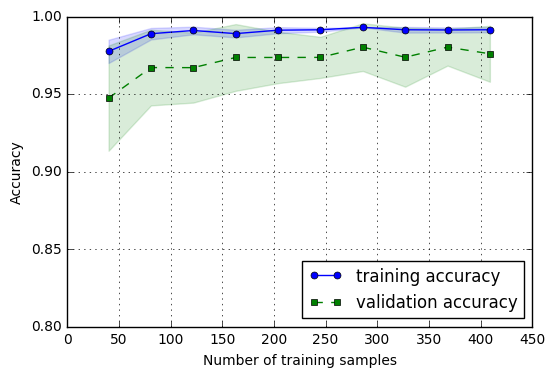

In [64]:
plt.show()

In [66]:
from sklearn.learning_curve import validation_curve

In [98]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

In [99]:
train_scores, test_scores = validation_curve(estimator=pipe_lr, X=X_train, y=y_train, param_name='clf__C', param_range=param_range, cv=10)

In [100]:
train_mean = np.mean(train_scores, axis=1)

In [101]:
train_std = np.std(train_scores, axis=1)

In [102]:
test_mean = np.mean(test_scores, axis=1)

In [103]:
test_std = np.std(test_scores, axis=1)

In [114]:
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')

In [115]:
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

In [116]:
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')

In [117]:
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

In [118]:
plt.grid()

In [119]:
plt.xscale('log')

In [120]:
plt.legend(loc='lower right')

In [121]:
plt.xlabel('Parameter C')

In [122]:
plt.ylabel('Accuracy')

In [123]:
plt.ylim([0.8, 1.0])

(0.8, 1.0)

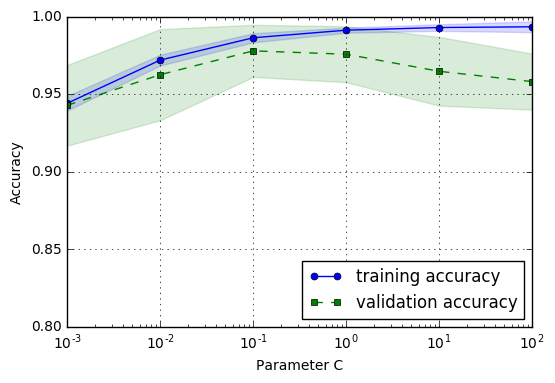

In [124]:
plt.show()

In [125]:
from sklearn.grid_search import GridSearchCV

/home/hirokiky/dev/pydata_now/env/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [126]:
from sklearn.svm import SVC

In [127]:
pipe_svc = Pipeline([('scl', StandardScaler()), ('clf', SVC(random_state=1))])

In [128]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

In [133]:
param_grid = [{'clf__C': param_range, 'clf__kernel': ['linear']}, {'clf__C': param_range, 'clf__gamma': param_range, 'clf__kernel': ['rbf']}]

In [134]:
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)

In [135]:
gs = gs.fit(X_train, y_train)

In [136]:
print(gs.best_score_)

0.978021978021978


In [137]:
print(gs.best_params_)

{'clf__C': 0.1, 'clf__kernel': 'linear'}


In [138]:
clf = gs.best_estimator_

In [139]:
clf.fit(X_train, y_train)

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False))])

In [140]:
print('Test accuracy: %.3f' % clf.score(X_test, y_test))

Test accuracy: 0.965


In [142]:
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=2, n_jobs=-1)

In [143]:
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)

In [144]:
print('%.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

0.965 +/- 0.025


In [145]:
from sklearn.tree import DecisionTreeClassifier

In [147]:
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
                 scoring='accuracy', cv=2)

In [148]:
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)

In [149]:
np.mean(scores), np.std(scores)

(0.92087912087912094, 0.028991002106094354)

In [151]:
from sklearn.metrics import confusion_matrix

In [152]:
pipe_svc.fit(X_train, y_train)

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False))])

In [154]:
y_pred = pipe_svc.predict(X_test)

In [155]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [157]:
print(confmat)

[[71  1]
 [ 2 40]]


In [158]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))

In [159]:
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)

In [161]:
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

In [163]:
plt.xlabel('predicted label')

In [164]:
plt.ylabel('true label')

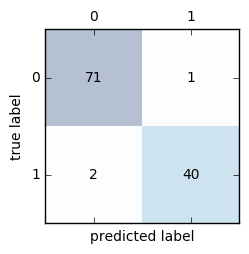

In [165]:
plt.show()

In [166]:
from sklearn.metrics import precision_score

In [167]:
from sklearn.metrics import recall_score, f1_score

In [168]:
precision_score(y_true=y_test, y_pred=y_pred)

0.97560975609756095

In [169]:
recall_score(y_true=y_test, y_pred=y_pred)

0.95238095238095233

In [170]:
f1_score(y_true=y_test, y_pred=y_pred)

0.96385542168674698

In [171]:
y_pred

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0])

In [172]:
y_test

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [174]:
from sklearn.metrics import make_scorer, f1_score

In [175]:
scorer = make_scorer(f1_score, pos_label=0)

In [176]:
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring=scorer, cv=10)

In [177]:
from sklearn.metrics import roc_curve, auc

In [179]:
from scipy import interp

In [180]:
pipe_lr = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=2)), ('clf', LogisticRegression(penalty='l2', random_state=0, C=100.0))])

In [181]:
X_train2 = X_train[:, [4, 14]]

In [183]:
cv = StratifiedKFold(y_train, n_folds=3, random_state=1)

In [184]:
fig = plt.figure(figsize=(7, 5))

In [185]:
mean_tpr = 0.0

In [186]:
mean_fpr = np.linspace(0, 1, 100)

In [187]:
all_tpr = []

In [190]:
for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train], y_train[train]).predict_proba(X_train2[test])
    fpr, tpr, thresholds = roc_curve(y_train[test], probas[:, 1], pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))

In [191]:
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='random guessing')

In [192]:
mean_tpr /= len(cv)

In [193]:
mean_tpr[-1] = 1.0

In [194]:
mean_auc = auc(mean_fpr, mean_tpr)

In [195]:
plt.plot(mean_fpr, mean_tpr, 'k--', label='mean ROC (area = %0.2f)' % mean_auc, lw=2)

In [196]:
plt.plot([0, 0, 1], [0, 1, 1], lw=2, linestyle=':', color='black', label='perfect performance')

In [198]:
plt.xlim([-0.05, 1.05])

(-0.05, 1.05)

In [199]:
plt.ylim([-0.05, 1.05])

(-0.05, 1.05)

In [200]:
plt.xlabel('false positive rate')

In [201]:
plt.ylabel('true positive rate')

In [202]:
plt.title('Receiver Operator Charactericstic')

In [203]:
plt.legend(loc='lower right')

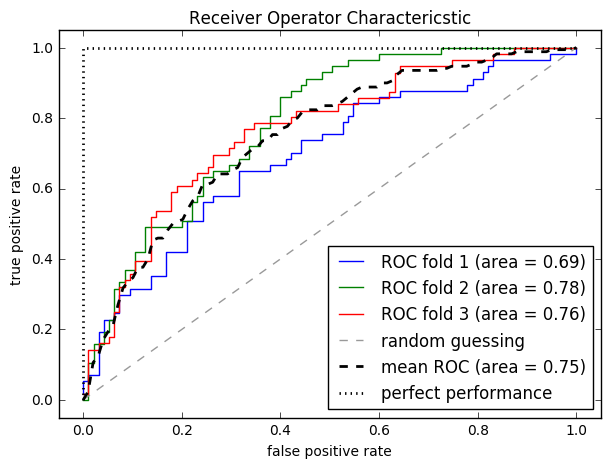

In [204]:
plt.show()

In [205]:
pre_score = make_scorer(score_func=precision_score, pos_label=1, greater_is_better=True, avarage='micro')

In [206]:
pre_score

make_scorer(precision_score, pos_label=1, avarage=micro)